## Imports

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

%matplotlib inline

np.random.seed(1)

## Dataset

In [2]:
DATADIR = "C:/Users/Omkar/ML and DS/Dog/dataset"

In [3]:
CATEGORIES = ["Golden1", "German1"]
img_size = 64

### Creating training data

In [4]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array,(img_size,img_size))
            training_data.append([new_array, class_num])

In [5]:
create_training_data()
print(len(training_data))

604


In [6]:
random.shuffle(training_data)

### Seperation of X,y

In [7]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

In [8]:
X = np.array(X)
y = np.array(y)

In [9]:
print("Shape of X = "+ str(X.shape))
print("Shape of y = " + str(y.shape))

Shape of X = (604, 64, 64, 3)
Shape of y = (604,)


In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

**Reshaping y**

In [11]:
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

Example of picture

y= [1]


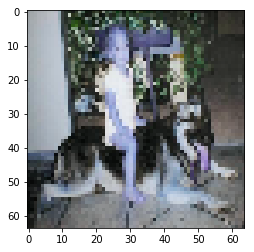

In [12]:
plt.imshow(x_train[5])
print("y= "+ str(y_train[:,5]))

Explore Dataset

In [13]:
m_train = x_train.shape[0]
m_test = x_test.shape[0]
num_px = x_train.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 483
Number of testing examples: m_test = 121
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (483, 64, 64, 3)
train_set_y shape: (1, 483)
test_set_x shape: (121, 64, 64, 3)
test_set_y shape: (1, 121)


Reshaping Training and Test examples

In [14]:
train_set_x_flatten = x_train.reshape(x_train.shape[0], -1).T
test_set_x_flatten = x_test.reshape(x_test.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(y_test.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 483)
train_set_y shape: (1, 483)
test_set_x_flatten shape: (12288, 121)
test_set_y shape: (1, 121)
sanity check after reshaping: [193 230 248 223 235]


Standardizing Dataset

In [15]:
train_x = train_set_x_flatten/255.
test_x = test_set_x_flatten/255.

### Helper Functions

In [16]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A,cache

In [17]:
def relu(Z):
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    cache = Z
    return A,cache

In [18]:
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert(dZ.shape == Z.shape)
    return dZ

In [19]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    
    dZ[Z <= 0] = 0
    
    assert(dZ.shape == Z.shape)
    return dZ

### Initialization

In [20]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1,L):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l],
                                                   layer_dims[l-1])*0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l],1))*0.01
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l],
                                                  layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    return parameters

### Forward Prop

In [21]:
def linear_forward(A, W, b):
    Z = np.dot(W,A)+b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [22]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache"
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache"
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [23]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2    # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W'+ str(l)],
                                             parameters['b'+ str(l)],
                                             activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)],
                                          parameters['b' + str(L)],
                                          activation= "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

### Cost Function

$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

In [24]:
def compute_cost(AL, Y):
    m = Y.shape[1]

    cost = -(1/m) * np.sum(np.multiply(np.log(AL),Y) + 
                           np.multiply(np.log(1-AL),1-Y))
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

### Backward Prop

#### Linear back prop

In [25]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m) * np.dot(dZ,A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [26]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    return dA_prev, dW, db

### Update Parameters

In [27]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W"+ str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]
    return parameters

### Predict

In [28]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

### 2 Layer NN

In [43]:
def two_layer_model(X, Y, layer_dims, learning_rate = 0.002, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs=[]
    grads={}
    m=X.shape[1]
    #Initialize
    parameters = initialize_parameters_deep(layer_dims)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #Loop
    for i in range(0,num_iterations):
        #Forward prop: linear->relu->linear->sigmoid
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        #compute cost
        cost = compute_cost(A2,Y)
        
        #Initialize back prop  dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        #Backwrd Prop
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        #Set grads
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        #Update Parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
        

Cost after iteration 0: 0.6935070607852265
Cost after iteration 1000: 0.6503662427518002
Cost after iteration 2000: 0.48213669527720215
Cost after iteration 3000: 0.30350108997160935
Cost after iteration 4000: 0.19592320942014246
Cost after iteration 5000: 0.12680860541998687
Cost after iteration 6000: 0.08365523109047043
Cost after iteration 7000: 0.057288555643014896
Cost after iteration 8000: 0.04112227505082012
Cost after iteration 9000: 0.03089141779037772
Cost after iteration 10000: 0.02414060796227053
Cost after iteration 11000: 0.019488569900775608
Cost after iteration 12000: 0.016149097581179887
Cost after iteration 13000: 0.013669120174560699
Cost after iteration 14000: 0.011771997157813002


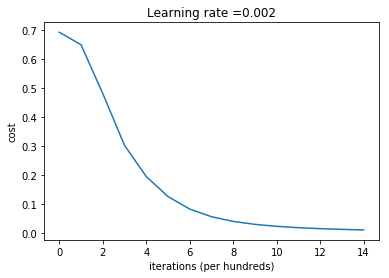

In [44]:
layer_dims = [12288,4,1] 
parameters_2 = two_layer_model(train_x,y_train,layer_dims,num_iterations=15000,print_cost=True)

In [45]:
preds_train = predict(train_x, y_train, parameters_2)

Accuracy: 0.9999999999999998


In [46]:
preds_test = predict(test_x, y_test, parameters_2)

Accuracy: 0.8181818181818181
